In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
 ## drop month day and year
df.drop(['month','day','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [8]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [9]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
## train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [11]:
X_train.shape

(181, 11)

In [12]:
## Feature selection based on correlation

In [13]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.654433,-0.305557,-0.313835,0.706005,0.504129,0.381657,0.613851,0.472834,0.537233,0.303801
RH,-0.654433,1.000000,0.307644,0.208491,-0.660235,-0.398996,-0.222399,-0.675897,-0.345321,-0.441142,-0.429319
Ws,-0.305557,0.307644,1.000000,0.164550,-0.232593,-0.014645,0.056238,-0.013692,0.015854,-0.104180,-0.197854
Rain,-0.313835,0.208491,0.164550,1.000000,-0.535747,-0.277890,-0.296357,-0.347931,-0.291091,-0.374042,-0.021543
FFMC,0.706005,-0.660235,-0.232593,-0.535747,1.000000,0.590284,0.490139,0.738960,0.577398,0.766896,0.231200
DMC,0.504129,-0.398996,-0.014645,-0.277890,0.590284,1.000000,0.881457,0.686661,0.982048,0.571692,0.217945
DC,0.381657,-0.222399,0.056238,-0.296357,0.490139,0.881457,1.000000,0.523241,0.943655,0.474031,-0.057608
ISI,0.613851,-0.675897,-0.013692,-0.347931,0.738960,0.686661,0.523241,1.000000,0.654267,0.743537,0.269752
BUI,0.472834,-0.345321,0.015854,-0.291091,0.577398,0.982048,0.943655,0.654267,1.000000,0.566833,0.112834
Classes,0.537233,-0.441142,-0.104180,-0.374042,0.766896,0.571692,0.474031,0.743537,0.566833,1.000000,0.173701


<Axes: >

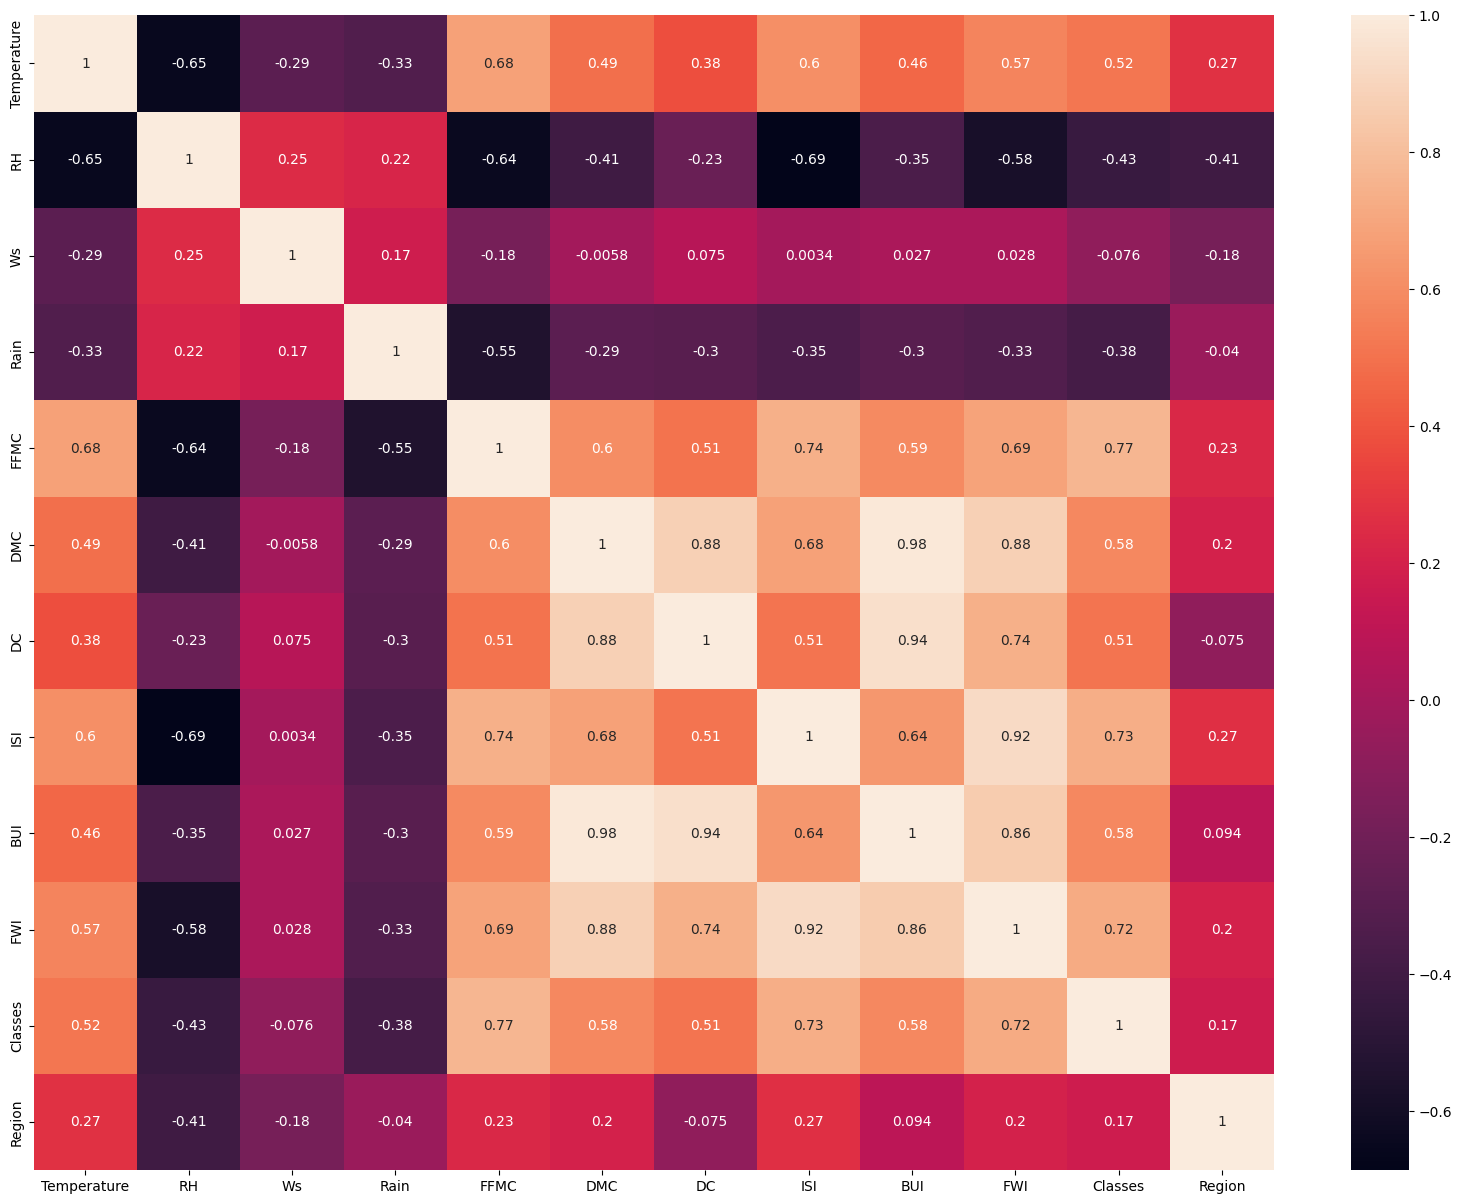

In [14]:
## Check for multicollinearity
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
def correlation(dataset,threshold):
    corr_matrix=dataset.corr()
    cor_name=set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                cor_name.add(corr_matrix.columns[i])
    return cor_name

In [16]:
corr_features=correlation(X_train,0.85)

In [17]:
## drop features when correlation is more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [18]:
## Feature Scaling or Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
82,36,55,18,0.0,89.1,33.5,9.9,1,0
124,30,64,14,0.0,79.4,5.2,2.2,0,1
155,34,45,18,0.0,90.5,18.7,11.3,1,1
128,28,51,17,1.3,71.4,7.7,1.5,0,1
19,30,80,16,0.4,59.8,3.4,0.9,0,0
...,...,...,...,...,...,...,...,...,...
58,32,73,15,0.0,86.6,26.7,5.6,1,0
21,31,67,17,0.1,79.1,7.0,2.4,0,0
49,33,65,15,0.1,81.4,12.3,2.8,1,0
64,34,69,13,0.0,85.0,8.2,4.0,1,0


In [21]:
X_train_scaled

array([[ 1.0245115 , -0.44091042,  0.86781454, ...,  1.24668268,
         0.87021926, -0.99449032],
       [-0.60689538,  0.18094506, -0.48919999, ..., -0.63678795,
        -1.14913568,  1.00554021],
       [ 0.48070921, -1.13186095,  0.86781454, ...,  1.58913189,
         0.87021926,  1.00554021],
       ...,
       [ 0.20880806,  0.25004011, -0.14994636, ..., -0.490024  ,
         0.87021926, -0.99449032],
       [ 0.48070921,  0.52642032, -0.82845362, ..., -0.19649611,
         0.87021926, -0.99449032],
       [-0.06309308, -0.09543516,  0.86781454, ..., -0.63678795,
        -1.14913568, -0.99449032]], shape=(181, 9))

## Boxplots to understand effect of StandardScaler

<Axes: >

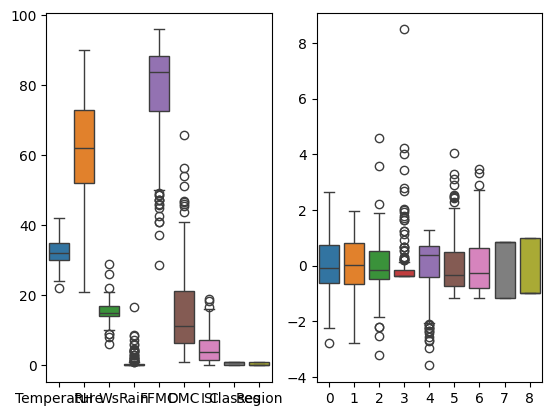

In [22]:

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

## Linear Regression Model

MAE :  0.6183405013763745
R2 Score :  0.9883726686675592


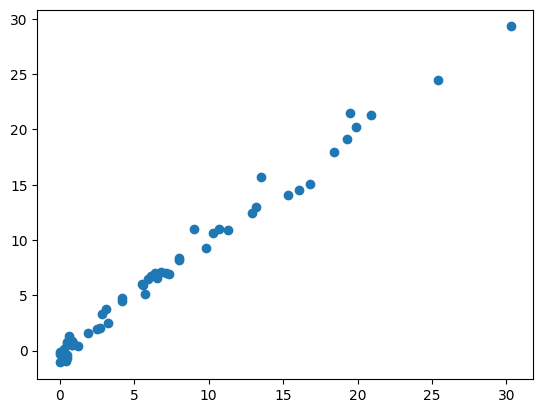

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)
plt.scatter(y_test,y_pred)

## Ridge Regression

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)


MAE :  0.6183405013763745
R2 Score :  0.9883726686675592


In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge=Ridge()   
ridge.fit(X_train_scaled,y_train)
pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  0.6183405013763745
R2 Score :  0.9883726686675592


In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  0.6183405013763745
R2 Score :  0.9883726686675592


## LassoCV()

In [28]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)  
score=r2_score(y_test,y_pred)
print("MAE : ",mae)
print("R2 Score : ",score)

MAE :  0.5945559597600817
R2 Score :  0.9883235136444869


In [ ]:
lassocv.alpha_

np.float64(0.042289904055496874)

In [ ]:
lassocv.alphas_.shape

(100,)

In [ ]:
lassocv.mse_path_.shape

(100, 5)

In [29]:
scaler

StandardScaler()

In [32]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))